In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
tita=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
tita.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tita.shape

(891, 12)

In [5]:
tita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
tita.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
tita.PassengerId.describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

In [8]:
tita.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
tita.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
tita.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
tita.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [12]:
tita.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

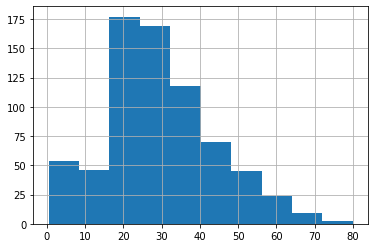

In [13]:
tita.Age.hist()

In [14]:
tita.Age.fillna(tita.Age.median(),inplace=True)

In [ ]:
tita.median()

In [ ]:
tita.Age.isnull().sum()

In [ ]:
Q1=tita.Age.quantile(0.25)
Q3=tita.Age.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)

In [ ]:
tita.Age[tita.Age>UE]=UE
tita.Age[tita.Age<LE]=LE

In [ ]:
plt.boxplot(tita.Age)

In [ ]:
tita.Age.median()

In [ ]:
tita.SibSp.value_counts()

In [ ]:
tita.Parch.value_counts()

In [ ]:
tita.Fare.isnull().sum()

In [ ]:
x=tita[['Age','Fare']]
y=tita.Survived

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state = 100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x_train,y_train)
model.score(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
y_predicted=model.predict(x_test)

In [ ]:
model.predict_proba(x_test)

In [ ]:
#CONFUSION MATRIX
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predicted)
cnf_matrix